## Máster en Big Data y Data Science

### Metodologías de gestión y diseño de proyectos de big data

#### AP2 - Visualización de los datos

---

En esta libreta se generan los modelos de visualización (gráficos) sobre los datasets 
del escenario para su posterior integración en la herramienta a utilizar. 

---

In [32]:
import plotly.io as pio
print(f"Renderizador actual: {pio.renderers.default}")
pio.renderers.default = "browser"


Renderizador actual: vscode


### Nota sobre el cambio de renderizador en Plotly

Durante la ejecución de los gráficos en **Visual Studio Code (VS Code)** utilizando **Plotly**, se presentó un error relacionado con el renderizador `"vscode"`. Este problema impidió la correcta visualización de los gráficos dentro del entorno de VS Code.

#### Motivo del cambio

El renderizador `"vscode"` depende de la integración de **Jupyter Notebook** dentro de VS Code, y puede fallar si:

- La extensión de **Jupyter** en VS Code no está instalada o configurada correctamente.
- Hay conflictos con la versión de **`nbformat`** o **`ipython`**.
- Se ejecuta el código en un **script `.py`** en lugar de un **Notebook `.ipynb`**.

In [43]:
# Importación de librerías

import pandas as pd
# En esta línea se podría producir un error, se debe instalar plotly
import plotly.express as px
import plotly.graph_objects as go

In [44]:
import nbformat
print(nbformat.__version__)

5.10.4


----

##### Lectura del dataset

In [45]:
df = pd.read_csv("../../../data/final/datos_finales.csv", sep=";")
df.head(5)

,operaciones_ult_12m,gastos_ult_12m,limite_credito_tc,antiguedad_cliente,tasa_interes,ingresos,pct_ingreso,antiguedad_empleado,edad,estado_civil_N,estado_credito_N,importe_solicitado,duracion_credito,situacion_vivienda,objetivo_credito,falta_pago,estado_cliente,genero,nivel_educativo,personas_a_cargo
0,50_a_75,2k_a_4k,5k_a_10k,2y_a_4y,7p_a_15p,hasta_20k,20_a_40,menor_5,menor_25,S,C,4200,4,PROPIA,PERSONAL,Y,ACTIVO,F,UNIVERSITARIO_INCOMPLETO,3.0
1,50_a_75,2k_a_4k,mayor_10k,2y_a_4y,15p_a_20p,mayor_100k,hasta_20,5_a_10,25_a_30,C,P,18000,3,ALQUILER,EDUCACIÓN,N,ACTIVO,M,UNIVERSITARIO_COMPLETO,3.0
2,50_a_75,2k_a_4k,mayor_10k,2y_a_4y,15p_a_20p,mayor_100k,hasta_20,mayor_10,25_a_30,C,C,20000,2,HIPOTECA,INVERSIONES,N,ACTIVO,M,POSGRADO_COMPLETO,3.0
3,50_a_75,2k_a_4k,mayor_10k,2y_a_4y,7p_a_15p,mayor_100k,hasta_20,5_a_10,menor_25,D,P,2500,2,PROPIA,EDUCACIÓN,N,ACTIVO,M,POSGRADO_INCOMPLETO,3.0
4,50_a_75,2k_a_4k,5k_a_10k,mayor_4y,7p_a_15p,mayor_100k,hasta_20,5_a_10,25_a_30,C,P,25000,3,ALQUILER,PERSONAL,N,ACTIVO,M,UNIVERSITARIO_COMPLETO,0.0


----

##### Definición de gráficos de interés

In [46]:
# Cantidad de créditos por objetivo del mismo

creditos_x_objetivo = px.histogram(df, x='objetivo_credito', 
                                   title='Conteo de créditos por objetivo')
creditos_x_objetivo.update_layout(xaxis_title='Objetivo del crédito', yaxis_title='Cantidad')

In [47]:
# Histograma de los importes de créditos otorgados

histograma_importes = px.histogram(df, x='importe_solicitado', nbins=10, title='Importes solicitados en créditos')
histograma_importes.update_layout(xaxis_title='Importe solicitado', yaxis_title='Cantidad')

In [48]:
# Conteo de ocurrencias por estado
estado_credito_counts = df['estado_credito_N'].value_counts()

# Gráfico de torta de estos valores
fig = go.Figure(data=[go.Pie(labels=estado_credito_counts.index, values=estado_credito_counts)])
fig.update_layout(title_text='Distribución de créditos por estado registrado')
fig.show()

In [49]:
# Conteo de ocurrencias por caso
falta_pago_counts = df['falta_pago'].value_counts()

# Create a Pie chart
fig = go.Figure(data=[go.Pie(labels=falta_pago_counts.index, values=falta_pago_counts)])
fig.update_layout(title_text='Distribución de créditos en función de registro de mora')
fig.show()

In [50]:
# Gráfico de barras apiladas: Comparar la distribución de créditos por estado y objetivo
barras_apiladas = px.histogram(df, x='objetivo_credito', color='estado_credito_N', 
                               title='Distribución de créditos por estado y objetivo',
                               barmode='stack')
barras_apiladas.update_layout(xaxis_title='Objetivo del crédito', yaxis_title='Cantidad')
barras_apiladas.show()

In [51]:
# Definir el orden personalizado
orden_antiguedad = ['menor_2y', '2y_a_4y', 'mayor_4y']

# Ordenar los datos según el orden personalizado
df_ordenado = df.groupby('antiguedad_cliente')['importe_solicitado'].mean().reset_index()
df_ordenado['antiguedad_cliente'] = pd.Categorical(df_ordenado['antiguedad_cliente'], categories=orden_antiguedad, ordered=True)
df_ordenado = df_ordenado.sort_values('antiguedad_cliente')

# Crear el gráfico de líneas
lineas_importes_antiguedad = px.line(df_ordenado, x='antiguedad_cliente', y='importe_solicitado',
                                     title='Evolución de los importes solicitados por antigüedad del cliente')
lineas_importes_antiguedad.update_layout(xaxis_title='Antigüedad del cliente', yaxis_title='Importe solicitado promedio')
lineas_importes_antiguedad.show()

Otros gráficos a implementar:

1. Distribución de los importes solicitados (`importe_solicitado`) por objetivo del crédito (`objetivo_credito`) en un gráfico de cajas.
2. Relación entre el importe solicitado (`importe_solicitado`) con la duración del crédito (`duracion_credito`), coloreado por estado del crédito (`estado_credito_N`) en un gráfico de dispersión.
3. Análisis de la correlación entre variables como `importe_solicitado`, `duracion_credito`, y `personas_a_cargo` en un mapa de calor.

Entre otros...

#### Gráficos obligatorios

In [53]:

# 1. Gráfico de cajas: Distribución de los importes solicitados por objetivo del crédito
fig_box = px.box(df, x='objetivo_credito', y='importe_solicitado', title='Distribución de importes solicitados por objetivo del crédito')
fig_box.update_layout(xaxis_title='Objetivo del crédito', yaxis_title='Importe solicitado')
fig_box.show()


In [54]:
# 2. Gráfico de dispersión: Relación entre importe solicitado y duración del crédito, coloreado por estado del crédito
fig_scatter_credito = px.scatter(df, x='duracion_credito', y='importe_solicitado', color='estado_credito_N',
                                 title='Relación entre importe solicitado y duración del crédito')
fig_scatter_credito.update_layout(xaxis_title='Duración del crédito (meses)', yaxis_title='Importe solicitado')
fig_scatter_credito.show()


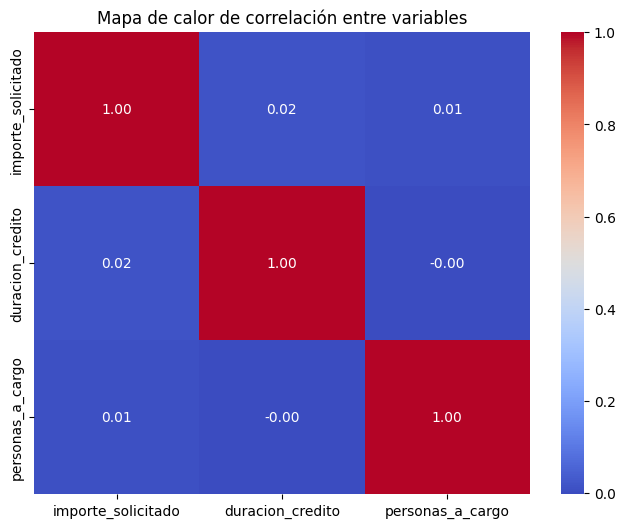

In [55]:
# 3. Mapa de calor: Correlación entre importe solicitado, duración del crédito y personas a cargo
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar las variables numéricas relevantes
corr_matrix = df[['importe_solicitado', 'duracion_credito', 'personas_a_cargo']].corr()

# Crear el mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de calor de correlación entre variables')
plt.show()

##### Gráficos estudiante

In [58]:
# 4. Gráfico de dispersión: Relación entre ingresos y límite de crédito
fig_scatter = px.scatter(df, x='ingresos', y='limite_credito_tc', color='estado_credito_N',
                         title='Relación entre ingresos y límite de crédito')
fig_scatter.update_layout(xaxis_title='Ingresos', yaxis_title='Límite de crédito')
fig_scatter.show()


In [59]:
# 5. Histograma: Distribución de tasas de interés
fig_hist = px.histogram(df, x='tasa_interes', nbins=20, title='Distribución de tasas de interés')
fig_hist.update_layout(xaxis_title='Tasa de interés (%)', yaxis_title='Cantidad de créditos')
fig_hist.show()
